In [21]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [22]:
from UncorrelatedFBSNNs import *
from CallOption import *

In [23]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 128  # number of trajectories (batch size)
N = 200  # number of time snapshots
D = 1 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0] * D)[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = CallOption(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 5 * 10 ** 3
lr = 1e-5

In [24]:
model.load_model("models/CallOption1.pth")

In [25]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 29700, Loss: 6.777e-01, Y0: 0.184, Time: 0.64, Learning Rate: 1.000e-05
It: 29800, Loss: 7.763e-01, Y0: 0.181, Time: 63.85, Learning Rate: 1.000e-05
It: 29900, Loss: 5.516e-01, Y0: 0.180, Time: 63.58, Learning Rate: 1.000e-05
It: 30000, Loss: 7.666e-01, Y0: 0.182, Time: 63.53, Learning Rate: 1.000e-05
It: 30100, Loss: 6.938e-01, Y0: 0.180, Time: 65.45, Learning Rate: 1.000e-05
It: 30200, Loss: 9.380e-01, Y0: 0.180, Time: 64.21, Learning Rate: 1.000e-05
It: 30300, Loss: 7.118e-01, Y0: 0.180, Time: 64.11, Learning Rate: 1.000e-05
It: 30400, Loss: 7.228e-01, Y0: 0.181, Time: 64.28, Learning Rate: 1.000e-05
It: 30500, Loss: 6.186e-01, Y0: 0.181, Time: 64.08, Learning Rate: 1.000e-05
It: 30600, Loss: 7.338e-01, Y0: 0.181, Time: 64.08, Learning Rate: 1.000e-05
It: 30700, Loss: 9.790e-01, Y0: 0.179, Time: 63.80, Learning Rate: 1.000e-05
It: 30800, Loss: 8.412e-01, Y0: 0.179, Time: 64.45, Learning Rate: 1.000e-05
It: 30900, Loss: 9.343e-01, Y0: 0.180, Time: 64.57, Learning Rate: 1.0

In [26]:
graph = model.iteration, model.training_loss

In [27]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()



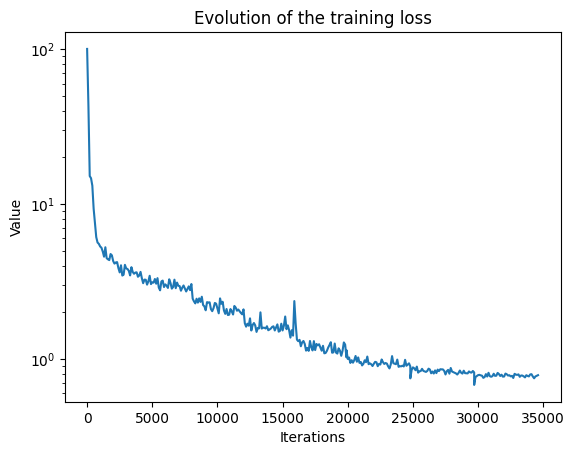

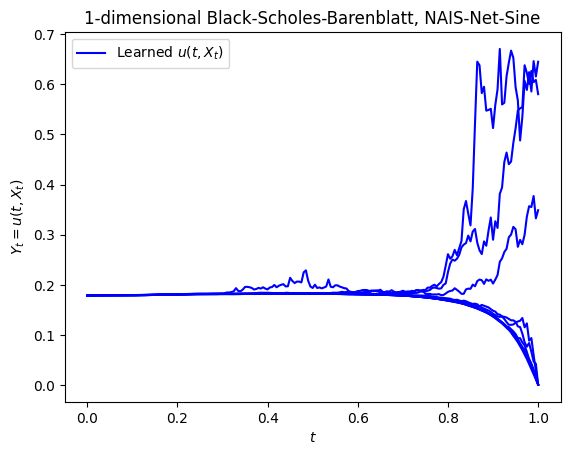

In [28]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 10
plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [29]:
Y_pred.shape

(8192, 201, 1)

In [30]:
r = 0.05

In [31]:
Y_preds = Y_pred.reshape(8192,201)

In [32]:
time_stamps = t_test[0].reshape(201,)
time_stamps

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,

In [33]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([0.17895257, 0.17902525, 0.17908815, 0.17915131, 0.17918158,
       0.17919566, 0.1792015 , 0.17919378, 0.17917652, 0.17914987,
       0.17911333, 0.17907426, 0.17903712, 0.17899217, 0.1789462 ,
       0.17890777, 0.17886415, 0.17882441, 0.17878789, 0.17875564,
       0.17872642, 0.17870404, 0.17868312, 0.17866808, 0.17866181,
       0.17866243, 0.17866911, 0.17868526, 0.17870611, 0.17873931,
       0.17877904, 0.17883089, 0.17888644, 0.17895329, 0.17902288,
       0.17910212, 0.17918311, 0.17926249, 0.17934269, 0.17942184,
       0.17949584, 0.1795668 , 0.17962092, 0.17967336, 0.1797111 ,
       0.17974238, 0.1797562 , 0.17976132, 0.17975299, 0.1797396 ,
       0.17972432, 0.17968962, 0.17965657, 0.17961845, 0.1795776 ,
       0.17954393, 0.17950687, 0.17946415, 0.17942135, 0.1793766 ,
       0.17933369, 0.17930222, 0.17927063, 0.17924504, 0.17921971,
       0.17920524, 0.17918478, 0.17918107, 0.17917728, 0.17918761,
       0.17917883, 0.17918003, 0.1791753 , 0.17917661, 0.17917

In [34]:
ene = np.mean(np.minimum(Y_preds,0),axis=0)
ene

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [35]:
from scipy.stats import multivariate_normal as normal

In [36]:
d1 = (np.log(1) + (0.05 + 0.5 * 0.4 ** 2) * (1 - 0) ) / (0.4 * np.sqrt(1 - 0))
d2 = (np.log(1) + (0.05 - 0.5 * 0.4 ** 2) * (1 - 0) ) / (0.4 * np.sqrt(1 - 0))

call = (1 * normal.cdf(d1, 0.0, 1.0) - 1 * np.exp(-0.05 * (1 - 0) ) * normal.cdf(d2, 0.0, 1.0))

In [37]:
call

0.18022951450216668

In [38]:
epe_exact = np.array([call for s in time_stamps[1:]])
ene_exact = np.array([0.0 for s in time_stamps[1:]])

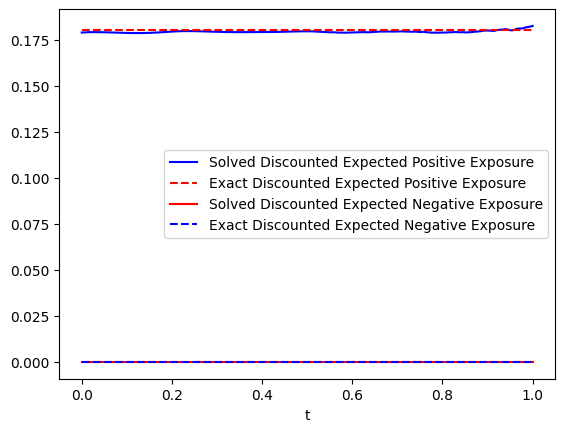

In [39]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,[call] + list(epe_exact),'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,[0.0]+list(ene_exact),'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [40]:
model.save_model("models/CallOption.pth")